In [ ]:
# @title Tải dữ liệu
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None

# Reading the data
movies = pd.read_csv(io.BytesIO(uploaded['movies.csv']))

In [ ]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
movies.shape

(7668, 15)

In [ ]:
output = movies.dropna()

In [ ]:
output.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
output.shape

(5421, 15)

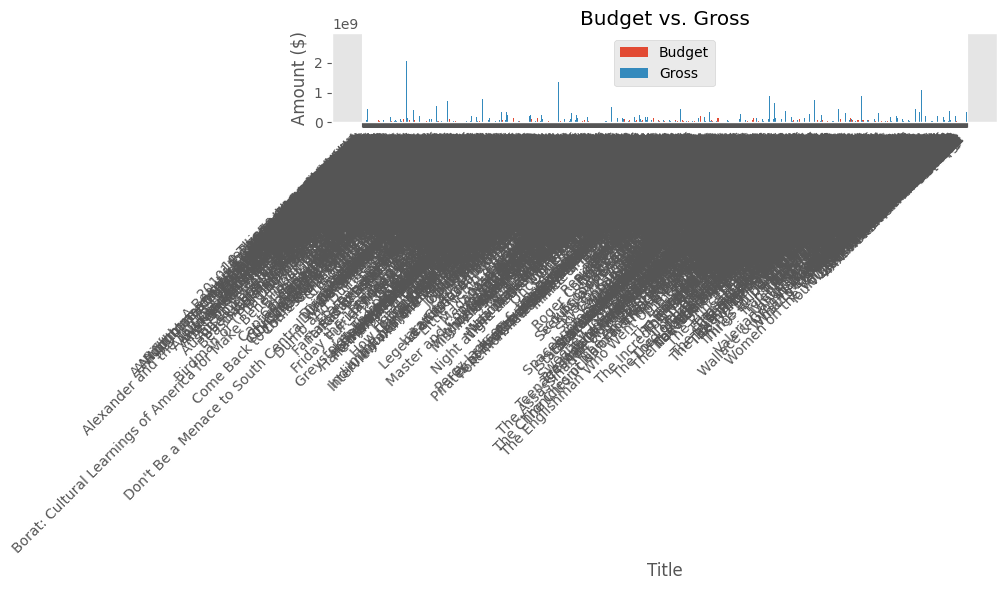

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv('../revised datasets/output.csv')

total_budget = output.groupby('name')['budget'].sum()
total_gross = output.groupby('name')['gross'].sum()

total_budget.index = total_budget.index.astype(str)
total_gross.index = total_gross.index.astype(str)

plt.figure(figsize=(10, 6))
plt.bar(total_budget.index, total_budget, label='Budget', width=0.4)
plt.bar(total_gross.index, total_gross, label='Gross', width=0.4, align='edge')
plt.xlabel('Title')
plt.ylabel('Amount ($)')
plt.title('Budget vs. Gross')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

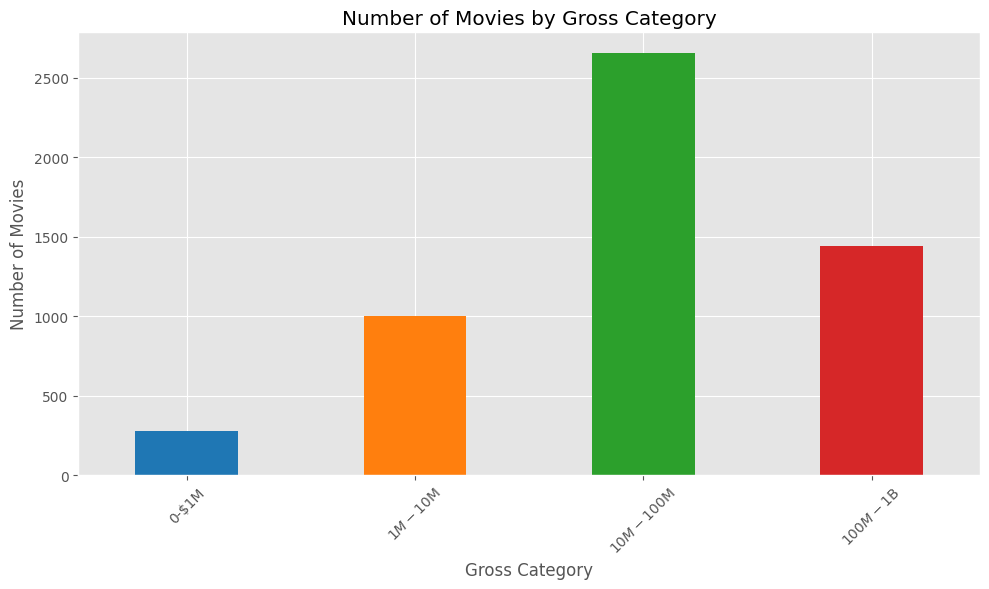

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv('revised datasets\output.csv')

bins = [0, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000]
labels = ['0-$1M', '$1M-$10M', '$10M-$100M', '$100M-$1B']

output['gross_category'] = pd.cut(output['gross'], bins=bins, labels=labels, right=False)

category_counts = output['gross_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', width=0.45, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Number of Movies by Gross Category')
plt.xlabel('Gross Category')
plt.ylabel('Number of Movies')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# import pandas as pd

# df = pd.read_csv('../revised datasets\output.csv')
print("Trước xử lí")
null_counts = movies.isnull().sum()

print(null_counts)

print("Sau xử lí")
null_counts = output.isnull().sum()

print(null_counts)

Trước xử lí
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
Sau xử lí
name               0
rating             0
genre              0
year               0
released           0
score              0
votes              0
director           0
writer             0
star               0
country            0
budget             0
gross              0
company            0
runtime            0
gross_category    48
dtype: int64


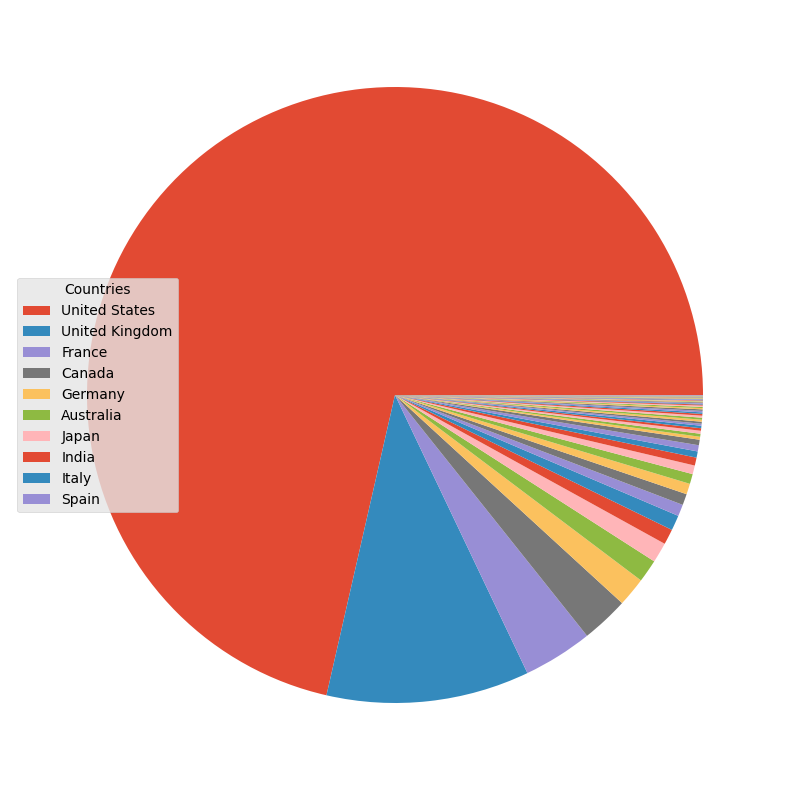

In [ ]:
# import pandas as pd

# import matplotlib.pyplot as plt

# df = pd.read_csv('revised datasets\movies.csv')

country_counts = movies['country'].value_counts()

fig, ax = plt.subplots(figsize=(10, 10))  # Make the plot bigger
ax.pie(country_counts, autopct='')  # Remove percentages

ax.legend(title="Countries", labels=country_counts.index[:10], loc='center left')

plt.show()

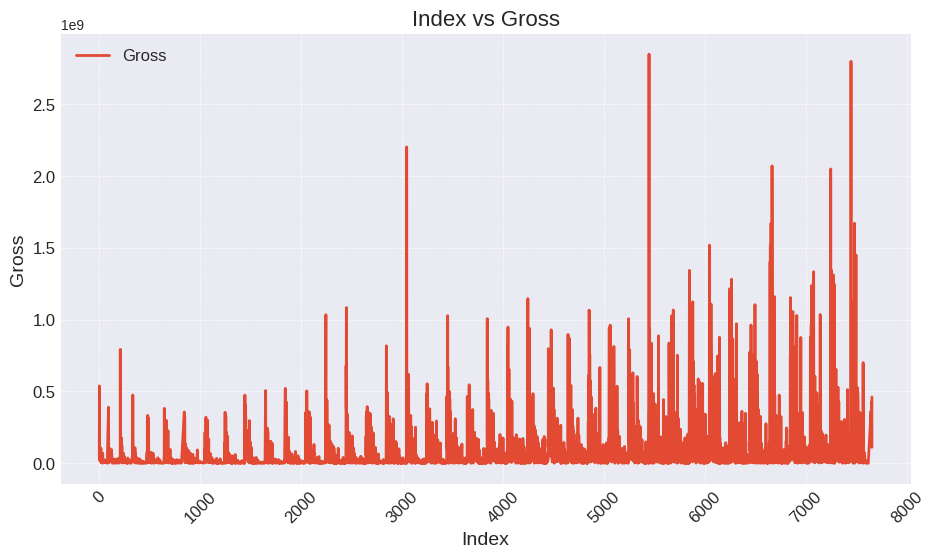

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv('../revised datasets\output.csv')

plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(output.index, output['gross'], label='Gross', linewidth=2)

ax.set_title('Index vs Gross', fontsize=16)
ax.set_xlabel('Index', fontsize=14)
ax.set_ylabel('Gross', fontsize=14)

ax.grid(True, linestyle='--', linewidth=0.5)

ax.tick_params(axis='both', labelsize=12)

plt.xticks(rotation=45)

legend = ax.legend(loc='upper left', shadow=True, fontsize='large', fancybox=True)

legend.get_frame().set_facecolor('white')

plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15)

plt.show()

 22%|██▏       | 2/9 [06:19<22:07, 189.65s/it]



Final Training Accuracy: 94.08%
Final Test Accuracy: 70.89%

Mean Squared Error: 7724365332952599.0



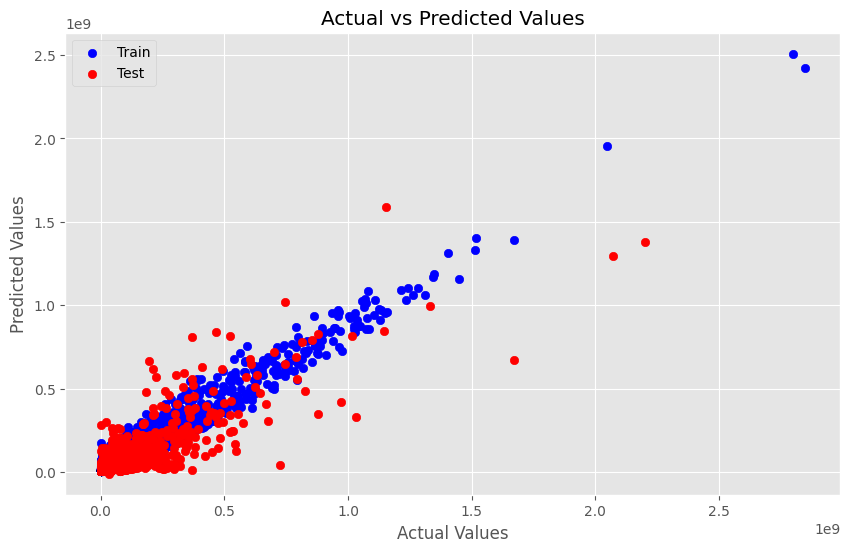

In [ ]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

numeric_cols = movies.select_dtypes(include=['number']).columns
categorical_cols = movies.select_dtypes(exclude=['number']).columns

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

movies[numeric_cols] = numeric_imputer.fit_transform(movies[numeric_cols])
movies[categorical_cols] = categorical_imputer.fit_transform(movies[categorical_cols])

le = LabelEncoder()

# Encode categorical features
categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    movies[feature] = le.fit_transform(movies[feature])

movies['budget_per_score'] = movies['budget'] / movies['score']

numeric_features = ['score', 'budget', 'budget_per_score']
categorical_features = categorical_cols.tolist()
features = movies[numeric_features + categorical_features]
target = movies['gross']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingRegressor(random_state=42))
])

rf_param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 5],
    'rf__max_features': ['sqrt', None]
}

gb_param_grid = {
    'gb__n_estimators': [50, 100, 150],
    'gb__max_depth': [3, 6],
    'gb__learning_rate': [0.05, 0.1]
}

rf_gridsearch = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
gb_gridsearch = GridSearchCV(gb_pipeline, param_grid=gb_param_grid, cv=3, scoring='r2', n_jobs=-1)

with tqdm(total=len(rf_param_grid) * len(gb_param_grid)) as pbar:
    rf_gridsearch.fit(X_train, y_train)
    pbar.update()

    gb_gridsearch.fit(X_train, y_train)
    pbar.update()

ensemble_model = VotingRegressor([
    ('rf', rf_gridsearch.best_estimator_),
    ('gb', gb_gridsearch.best_estimator_)
])

ensemble_model.fit(X_train, y_train)

train_predictions = ensemble_model.predict(X_train)
test_predictions = ensemble_model.predict(X_test)

train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print()
print(f'Final Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

print()

mse = mean_squared_error(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_test, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# @title Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

In [ ]:
numeric_cols = output.select_dtypes(include=['number']).columns
categorical_cols = output.select_dtypes(exclude=['number']).columns

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

movies[numeric_cols] = numeric_imputer.fit_transform(movies[numeric_cols])
movies[categorical_cols] = categorical_imputer.fit_transform(movies[categorical_cols])

le = LabelEncoder()

# Encode categorical features
categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    movies[feature] = le.fit_transform(movies[feature])

movies['budget_per_score'] = movies['budget'] / movies['score']

numeric_features = ['score', 'budget', 'budget_per_score']
categorical_features = categorical_cols.tolist()
features = movies[numeric_features + categorical_features]
target = movies['gross']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingRegressor(random_state=42))
])

rf_param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 5],
    'rf__max_features': ['sqrt', None]
}

gb_param_grid = {
    'gb__n_estimators': [50, 100, 150],
    'gb__max_depth': [3, 6],
    'gb__learning_rate': [0.05, 0.1]
}

rf_gridsearch = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
gb_gridsearch = GridSearchCV(gb_pipeline, param_grid=gb_param_grid, cv=3, scoring='r2', n_jobs=-1)

with tqdm(total=len(rf_param_grid) * len(gb_param_grid)) as pbar:
    rf_gridsearch.fit(X_train, y_train)
    pbar.update()

    gb_gridsearch.fit(X_train, y_train)
    pbar.update()

ensemble_model = VotingRegressor([
    ('rf', rf_gridsearch.best_estimator_),
    ('gb', gb_gridsearch.best_estimator_)
])

ensemble_model.fit(X_train, y_train)

train_predictions = ensemble_model.predict(X_train)
test_predictions = ensemble_model.predict(X_test)

train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print()
print(f'Final Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

print()

mse = mean_squared_error(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_test, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Final Training Accuracy: 64.20%
Final Test Accuracy: 65.06%
Train MAPE: 117.25%
Test MAPE: 156.45%


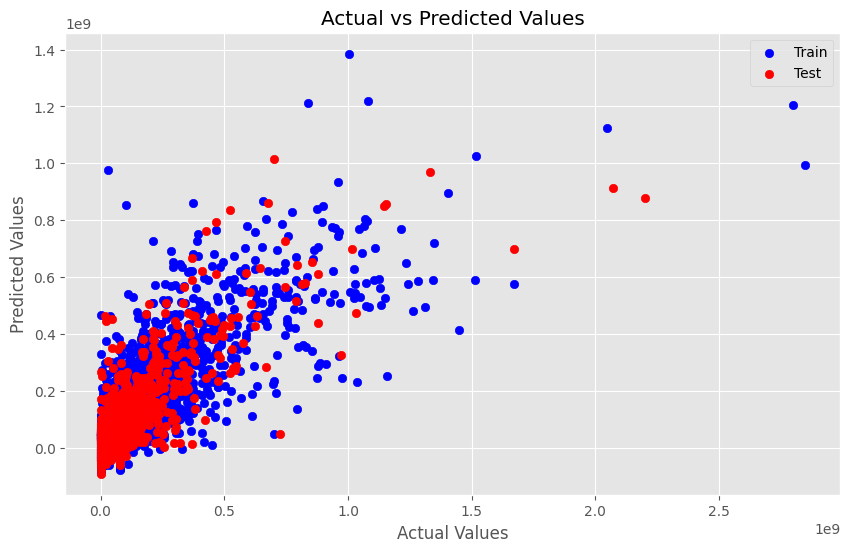

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# # Loading our dataset
# df = pd.read_csv('../revised datasets\output.csv')

le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
#categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    movies[feature] = le.fit_transform(movies[feature])

# Our features and target
features = movies[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = movies['gross']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')



# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_test, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R^2 Score: 0.654332656610895

Final Training Accuracy: 86.33%
Final Test Accuracy: 79.20%
Train MAPE: 52.95%
Test MAPE: 70.49%


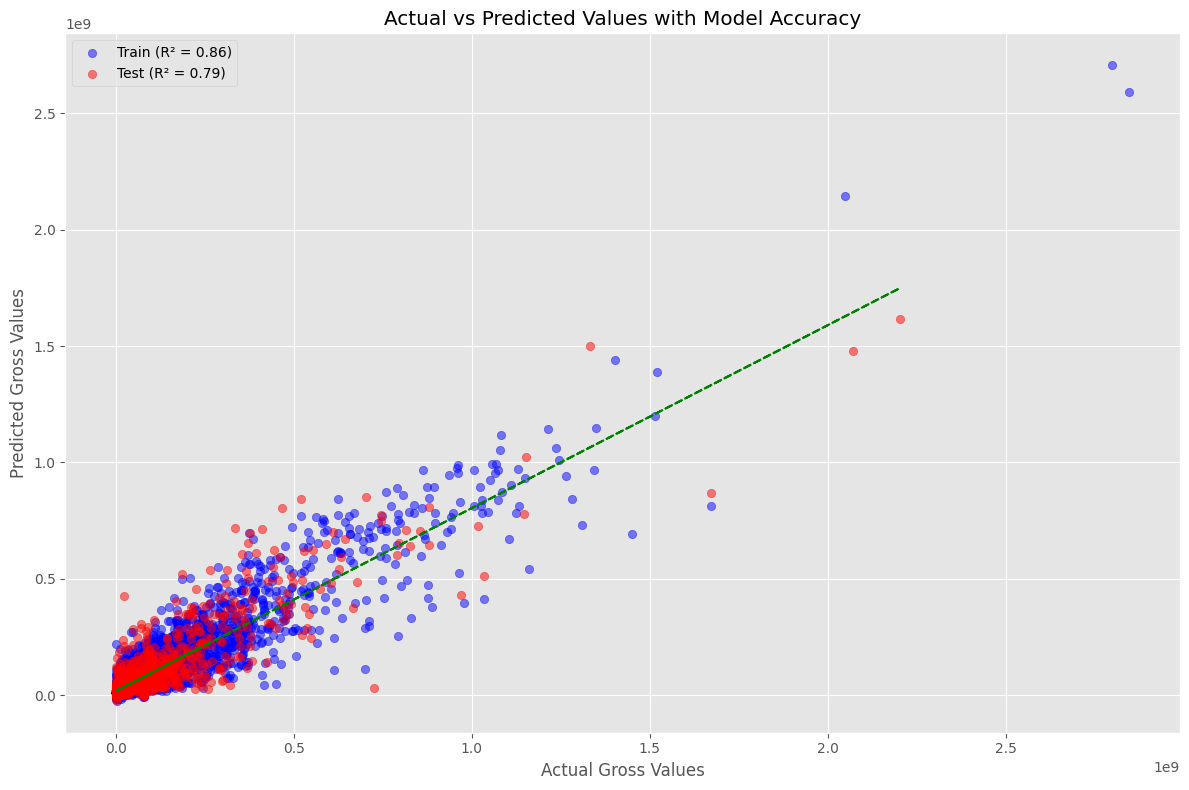

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# # Loading our dataset
# df = pd.read_csv('revised datasets\output.csv')

le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
#categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    movies[feature] = le.fit_transform(movies[feature])

# Our features and target
features = movies[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = movies['gross']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(features, target)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

best_model = GradientBoostingRegressor(loss='squared_error', random_state=42, **best_params)

best_model.fit(X_train, y_train)

train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')


# Plot actual vs predicted values with enhancements
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()

In [ ]:
# @title Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# Tải data
# df = pd.read_csv('revised datasets\output.csv')

In [ ]:
# @title Số hóa các thuộc tính không phải là số
le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
#categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    output[feature] = le.fit_transform(output[feature])

In [ ]:
# @title Lựa chọn các đặc trưng và mục tiêu
features = output[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = output['gross']

In [ ]:
# @title Chia dữ liệu 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))

      released  writer  rating  name  genre  director  star  country  company  \
3159      1631    2784       4  4989      0      1774   752       47     1382   
139       1810    2398       6  2878      0      1519  1570       46     1336   
3493       233     366       6   725      4       814  1292       47      392   
4524       894    2003       5  4926      0      1046  1167       47     1426   
5344      1691    2639       5     4      0      1694   231       47     1426   
...        ...     ...     ...   ...    ...       ...   ...      ...      ...   
5491      1809     875       6  4676      6      1064  1445        0     1365   
7277      2388    2304       3  2432      9      1458  1313       46     1290   
7319      2149     697       6  4170      0       571   324       15      452   
7547       702     936       5  2020      4      1940  1436       47      198   
1560      2089     415       6  3668      9       851  1698       46      830   

      runtime  score       

In [ ]:
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(features, target)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best R^2 Score: 0.676136828592518


In [ ]:
# @title Lựa chọn mô hình
model = GradientBoostingRegressor(loss='squared_error', random_state=42, **best_params)

In [ ]:
# @title Huấn luyện mô hình
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [ ]:
# @title Dự đoán dựa trên mô hình đã học
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# @title Tính toán R2 scores và MAPE
# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính trung bình R2 scores và MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')


Final Training Accuracy: 91.58%
Final Test Accuracy: 82.42%
Train MAPE: 10.57%
Test MAPE: 5.69%


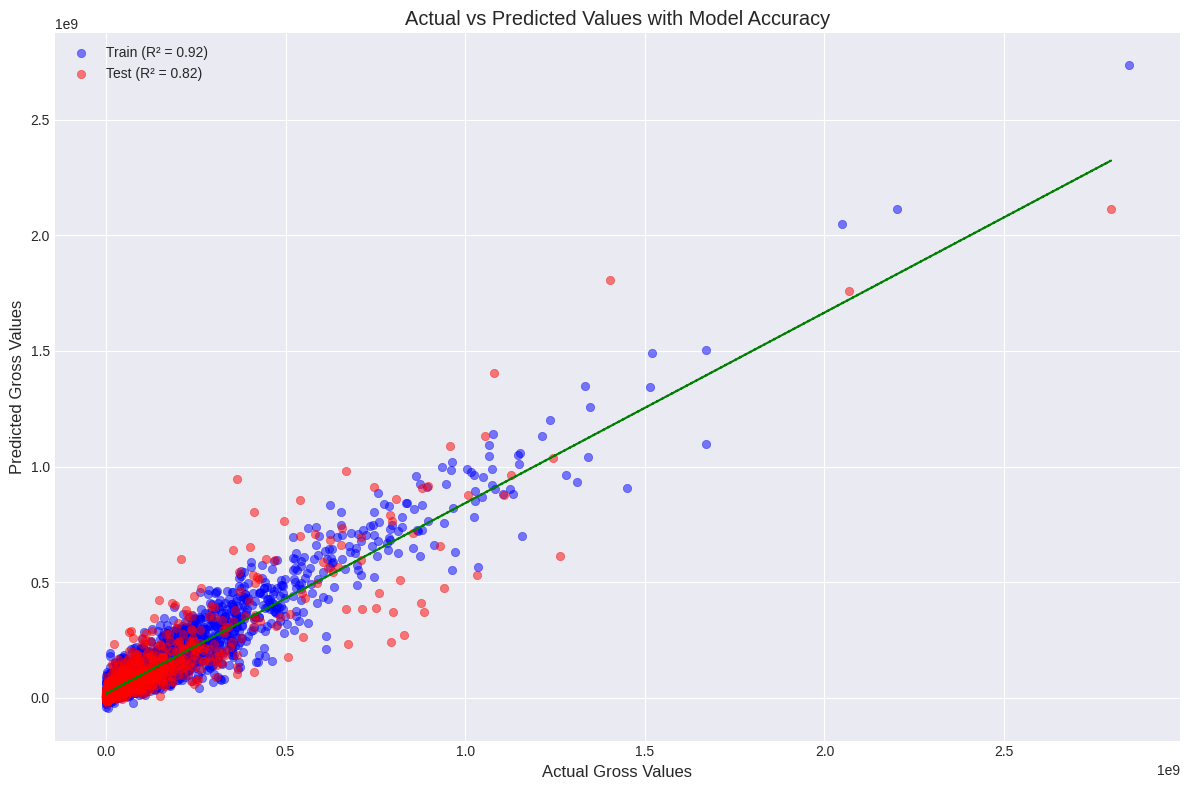

In [ ]:
# Plot actual vs predicted values with enhancements
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()

In [ ]:
import streamlit as st
import pandas as pd
from models.gradient_boost import best_model, le

# Function to preprocess the input
def preprocess_input(released, writer, rating, name, genre, director, star, country, company, runtime, score, budget, year, votes):
    released_encoded = le.fit_transform([released])
    writer_encoded = le.fit_transform([writer])
    rating_encoded = le.fit_transform([rating])
    name_encoded = le.fit_transform([name])
    genre_encoded = le.fit_transform([genre])
    director_encoded = le.fit_transform([director])
    star_encoded = le.fit_transform([star])
    country_encoded = le.fit_transform([country])
    company_encoded = le.fit_transform([company])

    input_data = pd.DataFrame({
        'released': released_encoded,
        'writer': writer_encoded,
        'rating': rating_encoded,
        'name': name_encoded,
        'genre': genre_encoded,
        'director': director_encoded,
        'star': star_encoded,
        'country': country_encoded,
        'company': company_encoded,
        'runtime': runtime,
        'score': score,
        'budget': budget,
        'year': year,
        'votes': votes,
    })

    return input_data

# Function to predict the gross range
def predict_gross_range(input_data):
    predicted_gross = best_model.predict(input_data)
    if predicted_gross <= 5000000:
        return "Low Revenue (<= $5M)"
    elif predicted_gross <= 25000000:
        return "Medium-Low Revenue ($5M - $25M)"
    elif predicted_gross <= 50000000:
        return "Medium Revenue ($25M - $50M)"
    elif predicted_gross <= 80000000:
        return "High Revenue ($50M - $80M)"
    else:
        return "Ultra High Revenue (>= $80M)"

st.markdown(
    """
    <h1 style='text-align: center; color: cyan;'>Movie Revenue Prediction</h1>
    """,
    unsafe_allow_html=True,
)

st.markdown(
    """
    <h2 style='text-align: center; color: white;'>Movie Details</h2>
    """,
    unsafe_allow_html=True,
)

with st.form(key='movie_form'):
    released = st.text_input("Release Date")
    writer = st.text_input("Writer")
    rating = st.selectbox("MPAA Rating", ['G', 'PG', 'PG-13', 'R', 'NC-17'])
    name = st.text_input("Movie Name")
    genre = st.text_input("Genre")
    director = st.text_input("Director")
    star = st.text_input("Leading Star")
    country = st.text_input("Country of Production")
    company = st.text_input("Production Company")
    runtime = st.number_input("Runtime (minutes)", min_value=0.0)
    score = st.number_input("IMDb Score", min_value=0.0, max_value=10.0)
    budget = st.number_input("Budget", min_value=0.0)
    year = st.number_input("Year of Release", min_value=1900, max_value=2100)
    votes = st.number_input("Initial Votes", min_value=0)
    submit_button = st.form_submit_button(label='Predict Revenue')

if submit_button:
    input_data = preprocess_input(released, writer, rating, name, genre, director, star, country, company, runtime, score, budget, year, votes)

    # Predict the revenue range
    predicted_gross_range = predict_gross_range(input_data)
    st.markdown('### Prediction Result')
    st.success(f'Predicted Revenue Range for "{name}": {predicted_gross_range}')

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
# import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder

# df = pd.read_csv('../../revised datasets\output.csv')

numerical_features = movies[['year', 'score', 'votes', 'budget', 'runtime']]
categorical_features = movies[['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']]
target = movies['gross']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(categorical_features)

numerical_features.columns = numerical_features.columns.astype(str)
categorical_feature_names = [str(col) for col in encoder.get_feature_names_out(categorical_features.columns)]
feature_names = categorical_feature_names + list(numerical_features.columns)

features = pd.concat([pd.DataFrame(encoded_categorical), numerical_features], axis=1)
features.columns = feature_names

kbest = SelectKBest(score_func=f_regression, k='all')

kbest.fit(features, target)

feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': kbest.scores_})

print(feature_scores)

feature_scores.to_csv('feature_scores.txt', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        Feature        Score
0      rating_0     0.065649
1      rating_1    23.291940
2      rating_2     3.952926
3      rating_3    34.002997
4      rating_4    41.764372
...         ...          ...
12773      year   520.017712
12774     score   265.225792
12775     votes  5010.946757
12776    budget  7849.250790
12777   runtime   474.101407

[12778 rows x 2 columns]


In [ ]:
# import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder

# df = pd.read_csv('../../revised datasets\output.csv')

numerical_features = movies[['year', 'score', 'votes', 'budget', 'runtime']]
categorical_features = movies[['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']]
target = movies['gross']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(categorical_features)

numerical_features.columns = numerical_features.columns.astype(str)
categorical_feature_names = [str(col) for col in encoder.get_feature_names_out(categorical_features.columns)]
feature_names = categorical_feature_names + list(numerical_features.columns)

features = pd.concat([pd.DataFrame(encoded_categorical), numerical_features], axis=1)
features.columns = feature_names

kbest = SelectKBest(score_func=f_regression, k='all')

kbest.fit(features, target)

feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': kbest.scores_})

significant_features = feature_scores[feature_scores['Score'] > 100]

print(significant_features)

significant_features.to_csv('significant_features.txt', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


             Feature        Score
5           rating_5   304.168353
6           rating_6   357.293312
12           genre_0   370.907328
14           genre_2   350.227132
16           genre_4   134.185655
18           genre_6   104.861788
193     director_162   324.083550
463     director_432   109.434242
710     director_679   163.215287
1156   director_1125   110.794371
1186   director_1155   177.325295
2224   director_2193   114.203860
3723      writer_743   273.781272
4721     writer_1741   107.101915
4758     writer_1778   152.281038
7127     writer_4147   110.329161
7952        star_437   146.640679
8039        star_524   165.591288
8067        star_552   140.804647
9756       star_2241   190.446739
11275    company_887   127.334912
11928   company_1540   156.221827
11994   company_1606   676.254475
12244   company_1856   153.236715
12704   company_2316   225.869239
12707   company_2319   109.164331
12773           year   520.017712
12774          score   265.225792
12775         